## 키와 몸무게의 지표 확인(data split 없이 진행)

In [9]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [10]:
# pandas를 통해 데이터를 확인합니다.

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
# 1 파운드 = 0.45359237kg
df['Weight'] = df['Weight'] * 0.45359237
# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
# 1 inch = 2.54cm
df['Height'] = df['Height'] * 2.54
df

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695
...,...,...,...
9995,Female,168.078536,62.041210
9996,Female,170.350573,77.504378
9997,Female,162.224700,58.275424
9998,Female,175.346978,74.322226


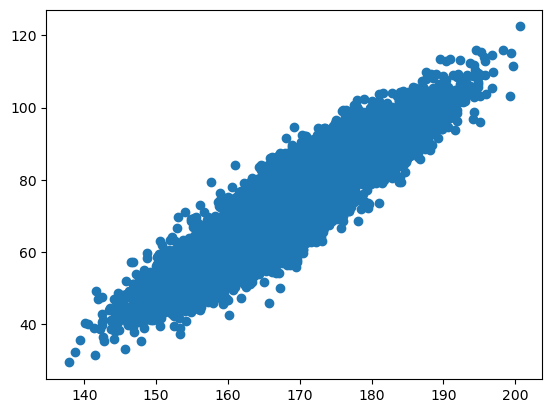

(10000, 1) (10000, 1)


In [28]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# Series에서 numpy로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()

# 가로로 나열된 데이터를 세로로 변환
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt
plt.plot(data,target,'o')
plt.show()

In [29]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data, target)

LinearRegression()

In [30]:
# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

array([[75.19390579]])

In [42]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
print(lr.coef_, lr.intercept_)

# y = Wx + b
# coef_ : W
# intercept_ : b

[1.38040358] -159.4455009206691


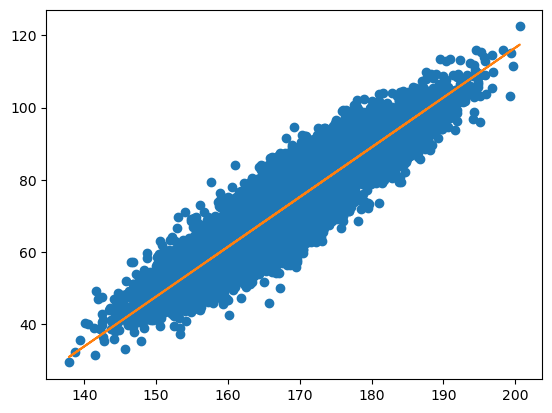

In [32]:
# 예측값 그래프 그리기
plt.plot(data, target, 'o')
plt.plot(data,lr.predict(data.reshape(-1,1)))
plt.show()

## data split을 통한 모델 검증

In [40]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split
import numpy as np

# train, test 분리를 위해 numpy배열로 변환
data = df['Height'].to_numpy()
target = df['Weight'].to_numpy()


# train, test 분리
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=40)

# 행(row)으로 나열된 데이터를 열(column) 단위로 변경
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [41]:
# 선형회귀모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_data,train_target)

# [70] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

array([75.22310699])

In [43]:
# score 확인
print(lr.score(train_data , train_target))
print(lr.score(test_data , test_target))

0.8564097769459904
0.850138541847046


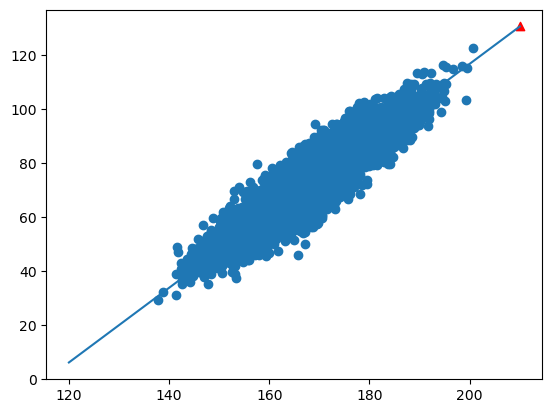

In [44]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(train_data , train_target)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()